In [60]:
! pip install yahoo_fin
! pip install arch

import warnings
warnings.simplefilter("ignore")

import yahoo_fin as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
from scipy. stats import skew
from scipy. stats import kurtosis
from yahoo_fin.stock_info import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
start = datetime.datetime(2007,1,1)
end = datetime.datetime(2022,1,1)

In [11]:
stock_mazda = get_data('MZDAY' , start_date = start, end_date = end)

stock_mazda.head()

stock_mazda=stock_mazda.dropna()
close_mazda = pd.DataFrame(stock_mazda["close"]).dropna()
simple_return_mazda = close_mazda.pct_change().dropna()
log_return_mazda = np.log(1+simple_return_mazda)

In [13]:
print(simple_return_mazda)

               close
2010-10-18  0.000000
2010-10-19  0.000000
2010-10-20  0.000000
2010-10-21  0.000000
2010-10-22  0.019493
...              ...
2021-12-27  0.000000
2021-12-28 -0.002584
2021-12-29 -0.007772
2021-12-30 -0.005222
2021-12-31 -0.005249

[2822 rows x 1 columns]


In [14]:
print(log_return_mazda)

               close
2010-10-18  0.000000
2010-10-19  0.000000
2010-10-20  0.000000
2010-10-21  0.000000
2010-10-22  0.019306
...              ...
2021-12-27  0.000000
2021-12-28 -0.002587
2021-12-29 -0.007802
2021-12-30 -0.005236
2021-12-31 -0.005263

[2822 rows x 1 columns]


In [28]:
stock_toyota = get_data('TM' , start_date = start, end_date = end)

stock_toyota.head()

stock_toyota=stock_toyota.dropna()
close_toyota = pd.DataFrame(stock_toyota["close"]).dropna()
simple_return_toyota = close_toyota.pct_change().dropna()
log_return_toyota = np.log(1+simple_return_toyota)

In [29]:
print(simple_return_toyota)

               close
2007-01-04  0.018256
2007-01-05 -0.029397
2007-01-08  0.001870
2007-01-09 -0.013510
2007-01-10 -0.020657
...              ...
2021-12-27  0.011536
2021-12-28 -0.006186
2021-12-29 -0.005792
2021-12-30  0.002178
2021-12-31  0.006628

[3776 rows x 1 columns]


In [30]:
print(log_return_toyota)

               close
2007-01-04  0.018091
2007-01-05 -0.029838
2007-01-08  0.001868
2007-01-09 -0.013603
2007-01-10 -0.020873
...              ...
2021-12-27  0.011469
2021-12-28 -0.006205
2021-12-29 -0.005808
2021-12-30  0.002175
2021-12-31  0.006606

[3776 rows x 1 columns]


In [31]:
stock_mazda.head()

,open,high,low,close,adjclose,volume,ticker
2010-10-15,6.4125,6.4125,6.4125,6.4125,6.4125,0,MZDAY
2010-10-18,6.4125,6.4125,6.4125,6.4125,6.4125,0,MZDAY
2010-10-19,6.4125,6.4125,6.4125,6.4125,6.4125,0,MZDAY
2010-10-20,6.4125,6.4125,6.4125,6.4125,6.4125,0,MZDAY
2010-10-21,6.4125,6.4125,6.4125,6.4125,6.4125,0,MZDAY


In [32]:
stock_toyota.head()

,open,high,low,close,adjclose,volume,ticker
2007-01-03,135.250000,136.539993,134.449997,135.300003,107.809212,758600,TM
2007-01-04,136.649994,137.970001,135.639999,137.770004,109.777336,842700,TM
2007-01-05,133.300003,133.869995,132.550003,133.720001,106.550232,1068400,TM
2007-01-08,134.600006,134.740005,133.800003,133.970001,106.749443,511600,TM
2007-01-09,132.169998,132.940002,131.240005,132.160004,105.307213,645700,TM


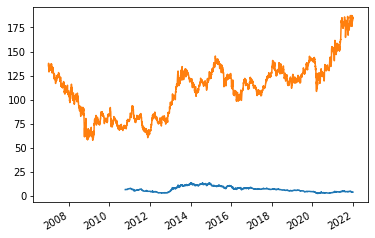

In [33]:
stock_mazda["close"].plot(grid = False)
stock_toyota["close"].plot(grid = False)

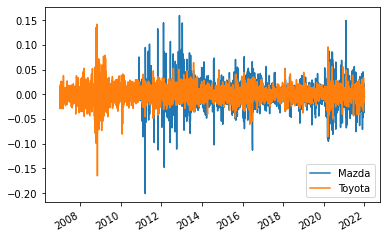

In [41]:
simple_return_mazda["close"].plot(label = 'Mazda', grid = False)
simple_return_toyota["close"].plot(label = 'Toyota', grid = False)
plt.legend()

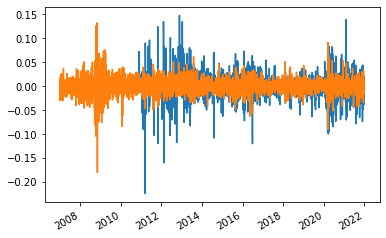

In [43]:
log_return_mazda["close"].plot(label = 'Mazda', grid = False)
log_return_toyota["close"].plot(label = 'Toyota', grid= False)

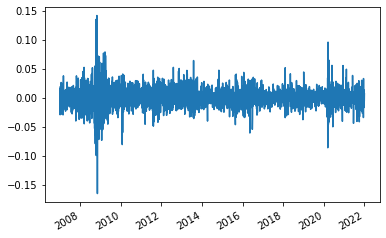

In [36]:
simple_return_toyota["close"].plot(grid = False)

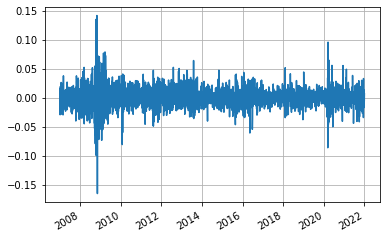

In [37]:
simple_return_toyota["close"].plot(grid = True)

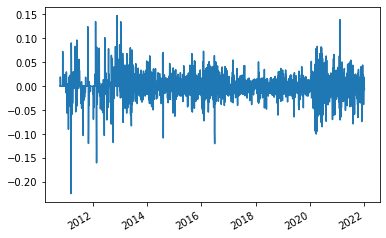

In [38]:
log_return_mazda["close"].plot(grid = False)


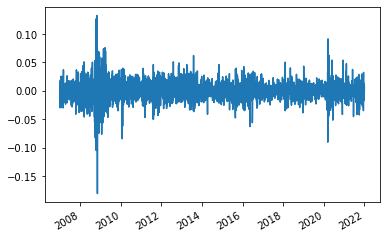

In [39]:
log_return_toyota["close"].plot(grid = False)

Text(0.5, 1.0, 'Distributie Mazda')

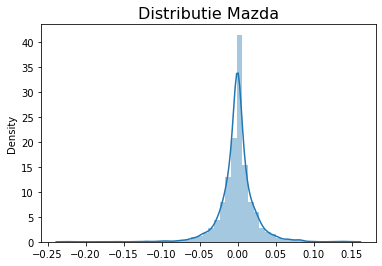

In [45]:
fig = sns.distplot(log_return_mazda, kde=True, norm_hist=True)                                    
fig.set_title('Distributie Mazda', fontsize=16)      

Text(0.5, 1.0, 'Distributie Toyota')

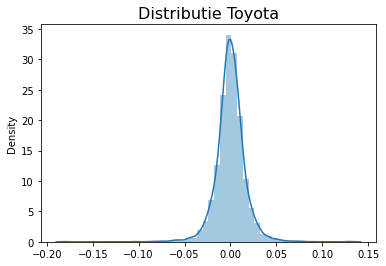

In [47]:
fig = sns.distplot(log_return_toyota, kde=True, norm_hist=True)                                    
fig.set_title('Distributie Toyota', fontsize=16) 

Distribuția este una cu asimetrie negativă și leptocurtică

In [66]:
print('Skewness si Kurtosis Toyota')
print(skew(log_return_toyota))
print(kurtosis(log_return_toyota))

Skewness si Kurtosis Toyota
[-0.24377587]
[9.864299]


In [65]:
print('Skewness si Kurtosis Mazda')
print(skew(log_return_mazda))
print(kurtosis(log_return_mazda))

Skewness si Kurtosis Mazda
[-0.33038864]
[9.59660632]
